<a href="https://colab.research.google.com/github/HyungJunByun/practice-history/blob/main/%ED%86%B5%EA%B3%84%ED%95%99%EC%8B%A4%ED%97%98_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

예제 1. genhlth 변수에 대해 적절한 방법을 이용하여 요약해보자. 범주형 자료의 경우에는 어떠한 요약 방법을 사용할 수 있는가?

genhlth
very good    6972
good         5675
excellent    4657
fair         2019
poor          677
Name: count, dtype: int64


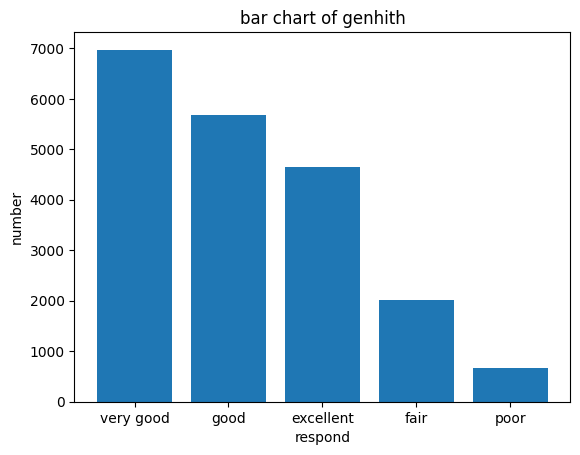

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cdc=pd.read_csv("/content/cdc.txt", sep=' ')
#데이터 분석을 위한 출력
print(cdc['genhlth'].value_counts())

#시각화
y=cdc['genhlth'].value_counts()
x=np.arange(len(y))
x_lab=['very good', 'good','excellent', 'fair', 'poor']
plt.bar(x,y)
plt.xticks(x, x_lab)
plt.title('bar chart of genhith')
plt.xlabel('respond')
plt.ylabel('number')

plt.show()

범주형 자료의 경우 각 범주에 해당하는 요소의 개수를 보여주는 것이 적절한 요약 방법이다. 이를 위해 print(cdc['genhlth'].value_counts())를 이용하여 각 범주에 해당하는 요소의 개수를 확인하였으며, 막대그래프를 이용하여 이를 시각화하였다.

예제 2. weight 변수에 대한 수치적 요약 값을 구해보자. 전체 응답자의 평균 몸무게는 얼마인가?

In [2]:
#weight 변수에 대한 수치적 요약 값
cdc['weight'].describe()

,weight
count,20000.00000
mean,169.68295
std,40.08097
min,68.00000
25%,140.00000
50%,165.00000
75%,190.00000
max,500.00000


In [3]:
#전체 응답자의 평균 몸무게
cdc['weight'].mean()

169.68295

양적 자료인 weight 변수에 대해서 cdc['weight'].describe()를 사용하여 필요한 수치적 요약 값을 한번에 얻을 수 있다. 평균값만을 얻으려면 다음줄처럼 cdc['weight'].mean()를 사용할 수도 있다. 그 결과 평균 몸무게는 169.68295이다.

예제 3. weight 변수와 wtdesire 변수의 산점도를 그려보자. 두 변수 사이에는 어떠한 관계가 존재한다고 보여지는가? 두 변수의 상관계수는 무엇을 나타내고 있는가?

Text(0.5, 1.0, 'weight-wtdesire scatter plot')

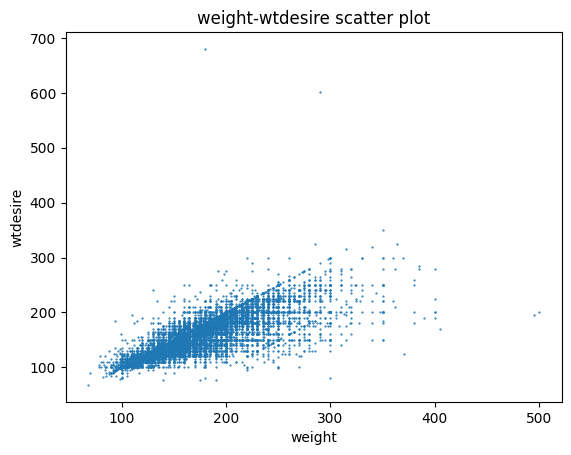

In [4]:
x=cdc['weight']
y=cdc['wtdesire']

plt.scatter(x,y,s=0.3)
plt.xlabel('weight')
plt.ylabel('wtdesire')
plt.title('weight-wtdesire scatter plot')

In [5]:
print(np.corrcoef(x,y))

[[1.         0.80005213]
 [0.80005213 1.        ]]


산점도는 plt.scatter() 함수를 이용해서 그릴 수 있다. 산점도를 그린결과와 상관계수 결과를 보면, weight 변수와 wtdesire 변수간에는 상당한 양의 상관관계가 있음을 알 수 있다.

예제 4. wtdesire 변수와 weight 변수의 차를 계산하여 새로운 변수 wdiff를 만들어보자. wdiff의 분포는 어떠한가? 수치적 요약과 그래프 요약을 통해 살펴보자. 이것이 의미하는 바는 무엇인가?

In [17]:
#widff 열의 생성
cdc['wdiff']=cdc['wtdesire']-cdc['weight']

In [18]:
#수치적 요약으로 살펴본 wdiff의 분포
cdc['wdiff'].describe()

,wdiff
count,20000.000000
mean,-14.589100
std,24.045856
min,-300.000000
25%,-21.000000
50%,-10.000000
75%,0.000000
max,500.000000


array([[<Axes: title={'center': 'wdiff'}>]], dtype=object)

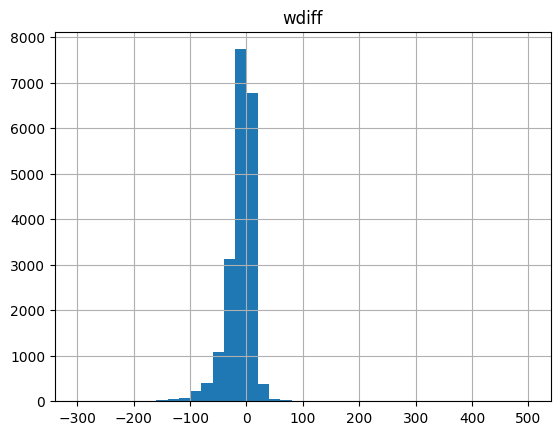

In [21]:
#그래프 요약
cdc.hist('wdiff', bins=40)

개인이 생각하는 이상적인 몸무게에서 현재 자신의 몸무게를 뺀 값이 wdiff이다. 이 값의 수치적 요약값을 보면 평균값과 2사분위수 모두 음수로, 살을 빼고 싶어하는 사람이 살을 찌우고 싶어하는 사람보다 많다는 것을 알 수 있다. 이러한 사실은 그래프 요약으로 그린 히스토그램을 비교해보아도 음수쪽에 더 많은 값이 속해 있는 것을 통해 알 수 있다.

예제 5. age 변수를 이용하여 히스토그램을 그려보자. 그리고 구간의 수를 50, 100으로 바꿔가며 동일한 히스토그램을 그린 후 비교해보자.

array([[<Axes: title={'center': 'age'}>]], dtype=object)

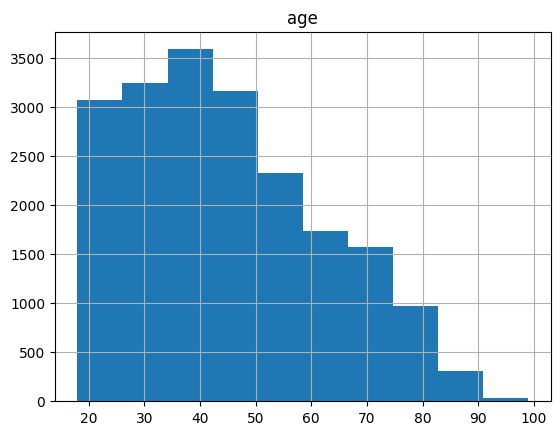

In [22]:
#10 구간 히스토그램
cdc.hist('age')

array([[<Axes: title={'center': 'age'}>]], dtype=object)

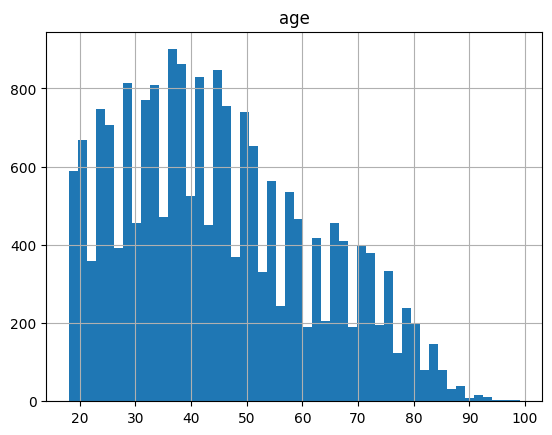

In [23]:
#50 구간 히스토그램
cdc.hist('age', bins=50)

array([[<Axes: title={'center': 'age'}>]], dtype=object)

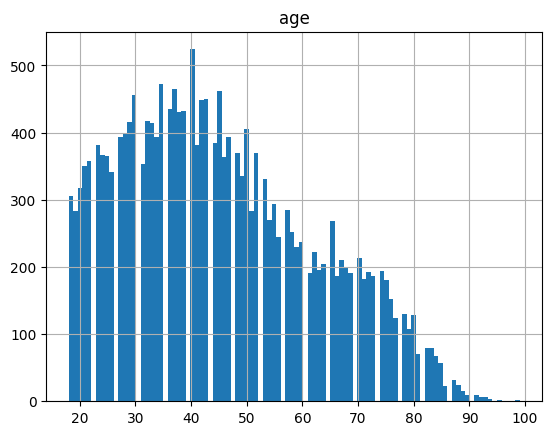

In [24]:
#100 구간 히스토그램
cdc.hist('age', bins=100)

age 히스토그램은 구간의 수와 관계없이, 40세 근처에서 최대값이 나타나고 오른쪽으로 긴 꼬리를 가지는 정규분포에 가까운 형태이다. 구간의 수를 늘릴수록 구간의 수가 작을 때는 드러나지 않았던 특징이 나타는데, 특히 60~75세에서 인구수가 거의 변하지 않는 구간이 있다는 점은 구간수가 늘어난 히스토그램에서 파악할 수 있다.